In [1]:
# Audio processing packages
import os
from pydub import AudioSegment
from xml.dom import minidom
import numpy as np
import pandas as pd
from pysndfx import AudioEffectsChain
from librosa import load

# Visualize wav files
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import wave
import sys
import scipy
from IPython.display import Audio

C:\Users\yg9ca\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
def change_amplitude(emotionfile, d1, newSoundFile, d2):
    
    if d1 <= d2:
        sound = AudioSegment.from_file(emotionfile) - np.random.randint(0, (6 * d2/d1 - 1))
        sound.export(newSoundFile, format='wav')  ### save the new generated file in a folder
    else:
        print('Invalid distance parameters. d1 should be <= d2.')

In [4]:
emotionfile = './03-01-03-01-01-01-02.wav'
emotionsound = AudioSegment.from_wav(emotionfile)  # variable crysound hold sound of emotion clip
#emotionsound = emotionsound + np.random.randint(-2,2)  # deamplifying or amplifying the sound  

# emotionsound = emotionsound - 8

change_amplitude(emotionfile, 0.3, './file_changed.wav', 0.8)

print('hello')

# emotionsound.export('./file_changed.wav', format='wav')  ### save the new generated file in a folder

hello


In [5]:
def info(wave_file):
    filename = wave_file

    fs, wave = scipy.io.wavfile.read(filename) 
    #Note that this particular file has a single channel. Most audio files will have two (stereo) channels.

    print('Data:', wave)
    print('Sampling rate:', fs)
    print('Audio length:', wave.size/fs, 'seconds')
    print('Lowest amplitude:', min(wave))
    print('Highest amplitude:', max(wave))

    Audio(filename)

In [6]:
def plotwave(fs, signal, maxf=None):
    """Visualize (a segment of) a wave file."""
    # maxf = maximum number of frames
    frames = scipy.arange(signal.size)   # x-axis
    if maxf:
        plt.plot(frames[:maxf], signal[:maxf])
        plt.xticks(scipy.arange(0, maxf, 0.5*fs), scipy.arange(0, maxf/fs, 0.5))
        plt.show()
    else:
        plt.plot(frames, signal)
        plt.xticks(scipy.arange(0, signal.size, 0.5*fs), scipy.arange(0, signal.size/fs, 0.5))
        plt.show()

In [7]:
def visualize_wav(wave_file):
    #import the pyplot and wavfile modules 

    # Read the wav file (mono)

    samplingFrequency, signalData = wavfile.read(wave_file)

    # Plot the signal read from wav file

    plt.subplot(211)
    plt.title('Spectrogram of ' + wave_file)

    plt.plot(signalData)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(212)
    plt.specgram(signalData,Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    plt.show()

In [8]:
# Downsampling by a factor of n removes all but every nth sample from the original sound, 
# and writes a new file with the same pitch as the original.
def downsample(filename, factor):
    """Lower the sampling rate by factor."""
    newfilename = filename[:-4]+'-down'+str(factor)+'.wav'
    fs, wave = scipy.io.wavfile.read(filename)
    newfs = fs/factor
    # fill in the rest
    indices = range(0, wave.size, factor)
    wave = wave[indices]
    scipy.io.wavfile.write(newfilename, newfs, wave)
'''  
downsample('sa1.wav', 2)
downsample('sa1.wav', 4)
downsample('sa1.wav', 8)
downsample('sa1.wav', 12)
''' 

"  \ndownsample('sa1.wav', 2)\ndownsample('sa1.wav', 4)\ndownsample('sa1.wav', 8)\ndownsample('sa1.wav', 12)\n"

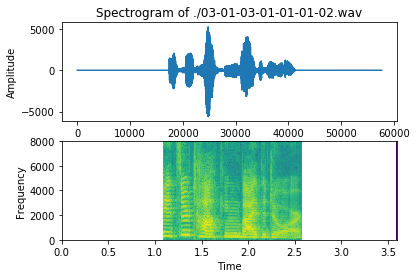

In [98]:
visualize_wav('./03-01-03-01-01-01-02.wav')

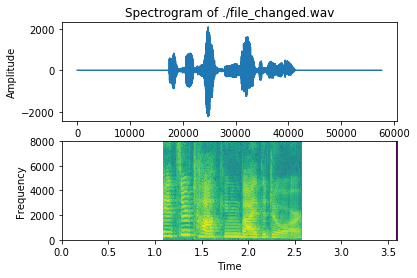

In [99]:
visualize_wav('./file_changed.wav')